In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\ozgurberat\anaconda3\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\ozgurberat\anaconda3\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 0, 1 and 2 are reserved indices.
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[0]

3

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
        
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train.shape

(8982, 10000)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# OR

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
len(one_hot_train_labels)

8982

In [11]:
one_hot_train_labels.shape

(8982, 46)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 61ms/step - loss: 3.2483 - accuracy: 0.3569 - val_loss: 1.8046 - val_accuracy: 0.6820
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.5366 - accuracy: 0.7107 - val_loss: 1.2803 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.0478 - accuracy: 0.7851 - val_loss: 1.1152 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.7890 - accuracy: 0.8369 - val_loss: 1.0040 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6281 - accuracy: 0.8720 - val_loss: 0.9540 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5092 - accuracy: 0.8941 - val_loss: 0.9133 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4283 - accuracy: 0.9115 - val_loss: 0.8845 - val_accuracy: 0.8180
Epoch 8/20
1

In [18]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

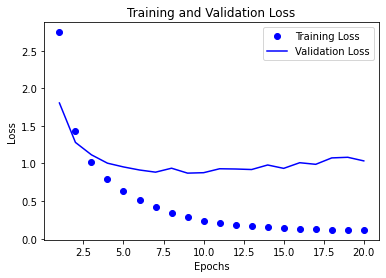

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

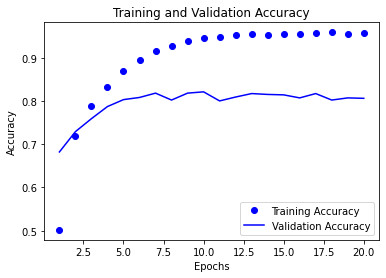

In [16]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, 21)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Solution for Overfitting

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(f'Loss: {results[0]}, Accuracy: {results[1]}')

Epoch 1/9
16/16 [==============================] - 2s 49ms/step - loss: 3.0934 - accuracy: 0.3564 - val_loss: 1.7169 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.4925 - accuracy: 0.7079 - val_loss: 1.2925 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.0831 - accuracy: 0.7833 - val_loss: 1.1387 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 0s 31ms/step - loss: 0.8027 - accuracy: 0.8307 - val_loss: 1.0296 - val_accuracy: 0.7930
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6498 - accuracy: 0.8639 - val_loss: 0.9722 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.88 - 1s 38ms/step - loss: 0.5266 - accuracy: 0.8886 - val_loss: 0.9276 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 34ms/step - loss: 0.4246 - accuracy: 0.9144 - val_loss: 0.8957 -